In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [5]:
calories= pd.read_csv('calories.csv')


In [6]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise= pd.read_csv('exercise.csv')

In [8]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [9]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
calories_data.shape

(15000, 9)

In [11]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
calories_data.isna().sum().sum()

np.int64(0)

In [14]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
stats =calories_data['Calories'].describe().reset_index()
stats['Calories']= round(calories_data['Calories'],2)
print(stats)


   index  Calories
0  count     231.0
1   mean      66.0
2    std      26.0
3    min      71.0
4    25%      35.0
5    50%     123.0
6    75%     112.0
7    max     143.0


In [16]:
calories_data.duplicated().sum()

np.int64(0)

In [20]:
calories_data.groupby('Gender')['Calories'].mean().sort_values(ascending=False)

Gender
male      90.945750
female    88.153052
Name: Calories, dtype: float64

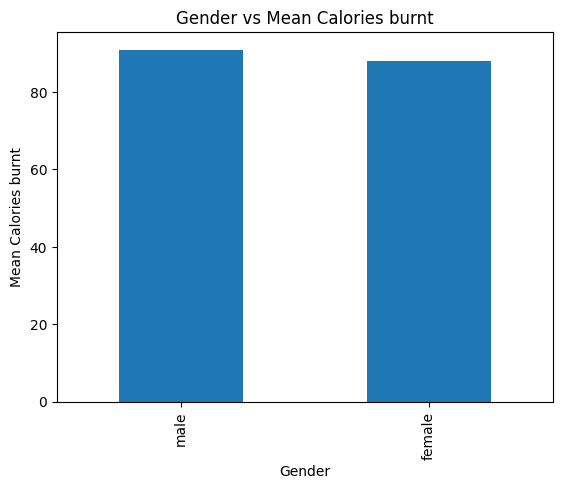

In [21]:
calories_data.groupby('Gender')['Calories'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Gender vs Mean Calories burnt')
plt.xlabel('Gender')
plt.ylabel('Mean Calories burnt')
plt.show()

C:\Users\manga\AppData\Local\Temp\ipykernel_20432\1950677799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

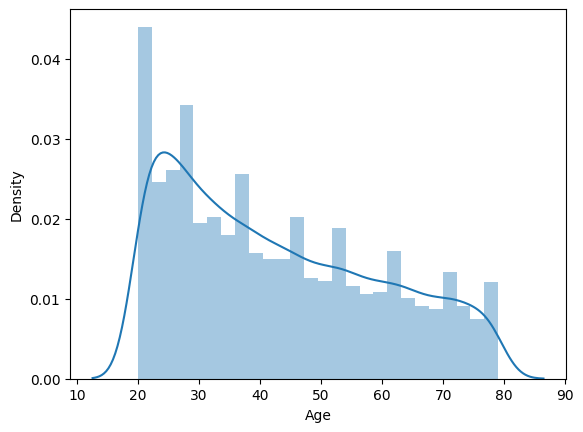

In [22]:
sns.distplot(calories_data['Age'])

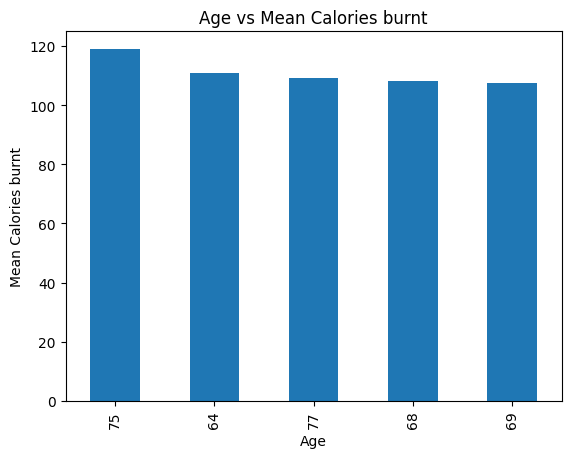

In [24]:
calories_data.groupby('Age')['Calories'].mean().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Age vs Mean Calories burnt')
plt.xlabel('Age')
plt.ylabel('Mean Calories burnt')
plt.show()

In [31]:
calories_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [32]:
X = calories_data.drop(columns=['User_ID','Calories','Heart_Rate', 'Body_Temp'], axis=1)
Y = calories_data['Calories']

In [34]:
print(Y)
print(X)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64
       Gender  Age  Height  Weight  Duration
0        male   68   190.0    94.0      29.0
1      female   20   166.0    60.0      14.0
2        male   69   179.0    79.0       5.0
3      female   34   179.0    71.0      13.0
4      female   27   154.0    58.0      10.0
...       ...  ...     ...     ...       ...
14995  female   20   193.0    86.0      11.0
14996  female   27   165.0    65.0       6.0
14997  female   43   159.0    58.0      16.0
14998    male   78   193.0    97.0       2.0
14999    male   63   173.0    79.0      18.0

[15000 rows x 5 columns]


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 5) (12000, 5) (3000, 5)


In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]}
 


In [52]:
xgb = XGBRegressor(random_state=42)

grid = GridSearchCV(estimator=xgb, param_grid=param_grid)

grid.fit(X_train, Y_train)



GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]})

In [53]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.9641101772108811


In [54]:
import joblib
joblib.dump(grid,"model.pkl")

['model.pkl']

In [55]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
